In [1]:
import pandas as pd
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_ber')

In [3]:
Daten.shape

(67, 444)

In [4]:
Daten.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,D-Q8b22c,D-Q9_1,D-Q9_2,E-T1,E-Q1,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed: 442,porc_nan
0,R_1kOiXpqqaX3Irxm,Default Response Set,Anonymous,NaN,NaN,88.3.172.215,0,2017-11-09 13:10:29,2017-11-09 13:25:39,1,...,NaN,NaN,1.0,1,Gratificante y útil,40.968795776367,-5.6638946533203,-1,NaN,71.846847
1,R_1F5FzvY7aYwiipy,Default Response Set,Anonymous,NaN,NaN,212.128.135.110,0,2017-11-10 01:39:27,2017-11-10 01:54:25,1,...,NaN,NaN,1.0,1,Una encuesta muy completa que me ha servido pa...,40.96809387207,-5.6620025634766,-1,NaN,70.270270
2,R_2ErWjTyNYcSh10N,Default Response Set,Anonymous,NaN,NaN,212.128.135.84,0,2017-11-10 02:23:28,2017-11-10 02:39:04,1,...,NaN,NaN,1.0,1,NaN,40.96809387207,-5.6620025634766,-1,NaN,70.720721


Glossar erstellen = Datei aufrufen (in anderem Notebook erstellt + gespeichert)

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss')

Funktion, um Index (Name) einer Bezeichnung im Glossar zu finden:

In [6]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Funktion, um Bezeichnung von Index im Glossar zu finden:

In [7]:
def get_name_glossind(word):
    for i, val in enumerate(gloss.index):
        if word.lower() in str(val).lower():
            return i, gloss.loc[val][0]

In [8]:
get_name_glossind('A-Q1')

(17,
 'Probablemente, en este texto encuentre palabras o grupos de palabras que no conoce aún. Sin embar...')

Grafik (Histogram) anzeigen:

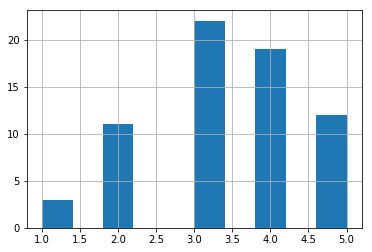

In [9]:
Daten['A_Q3_25'].hist()

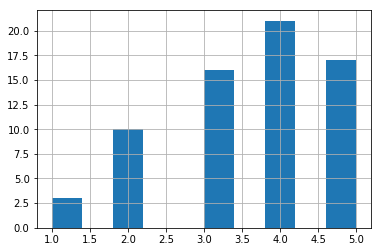

In [10]:
Daten['A_Q3_24'].hist()

Liste erstellen:

In [11]:
Liste_A_Q2 = [col for col in Daten.columns if 'A_Q2' in col]

später sollen Listen für alle Fragenkomplexe erstellt werden (alle Likert zumindest)

In [12]:
Liste_C_Q1 = [col for col in Daten.columns if 'C_Q1' in col]

Funktion erstellen:

Name + in Klammer Variablen
* fig = Figur/Grafik; plt = Library matplotlib aufrufen (hier wird Platz für Grafik reserviert)
* i = Nummer der Figuren - gleiche Reihenfolge wie Spalten (=col) der Liste
* enumerate = Liste durchgehen
* plt.subplot = der Reihe nach Grafiken erstellen, n Zeilen, n Spalten
* plt.hist = erstellt Histogram für angegebene Daten; .dropna -> fehlende Werte weglassen
* plt.title = Titel hinzufügen
* plt.show = Grafiken anzeigen

In [13]:
def graf_hist(l,sx,sy,nrow,ncol):
    fig = plt.figure(figsize=(sx,sy))
    for i, col in enumerate(l):
        plt.subplot(nrow,ncol,i+1)
        plt.hist(Daten[col].dropna(),color = '#0063A6')
        plt.xticks([1,2,3,4,5])
        plt.title(col,size=13)
    plt.show()

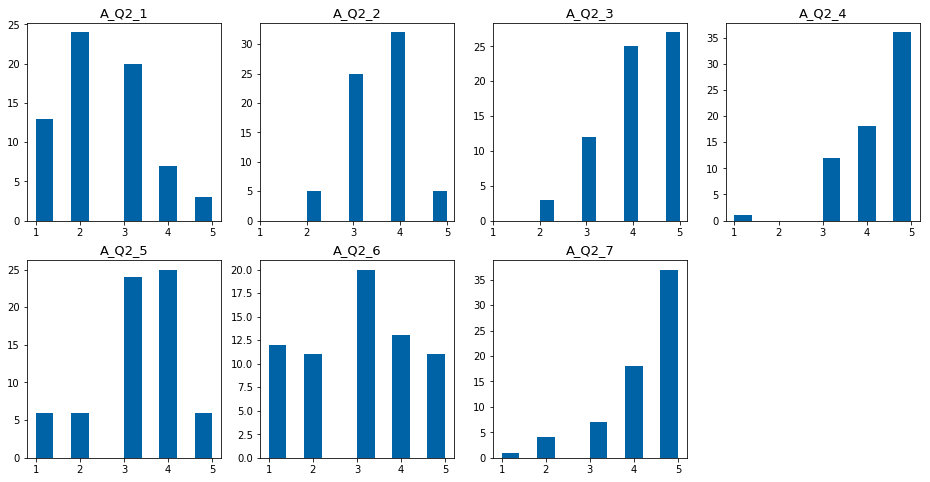

In [14]:
graf_hist(Liste_A_Q2,16,8,2,4)

In [15]:
Liste_A_Q3 = [col for col in Daten.columns if 'A_Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3A_Q3_3_TEXT'

kann noch verbessert werden:

statt Spalte "3" (eigentlich 4, Python zählt ja ab 0) irgendwie "text"-Spalte weglassen

In [16]:
len(Liste_A_Q3)

33

len = Länge der Liste anzeigen

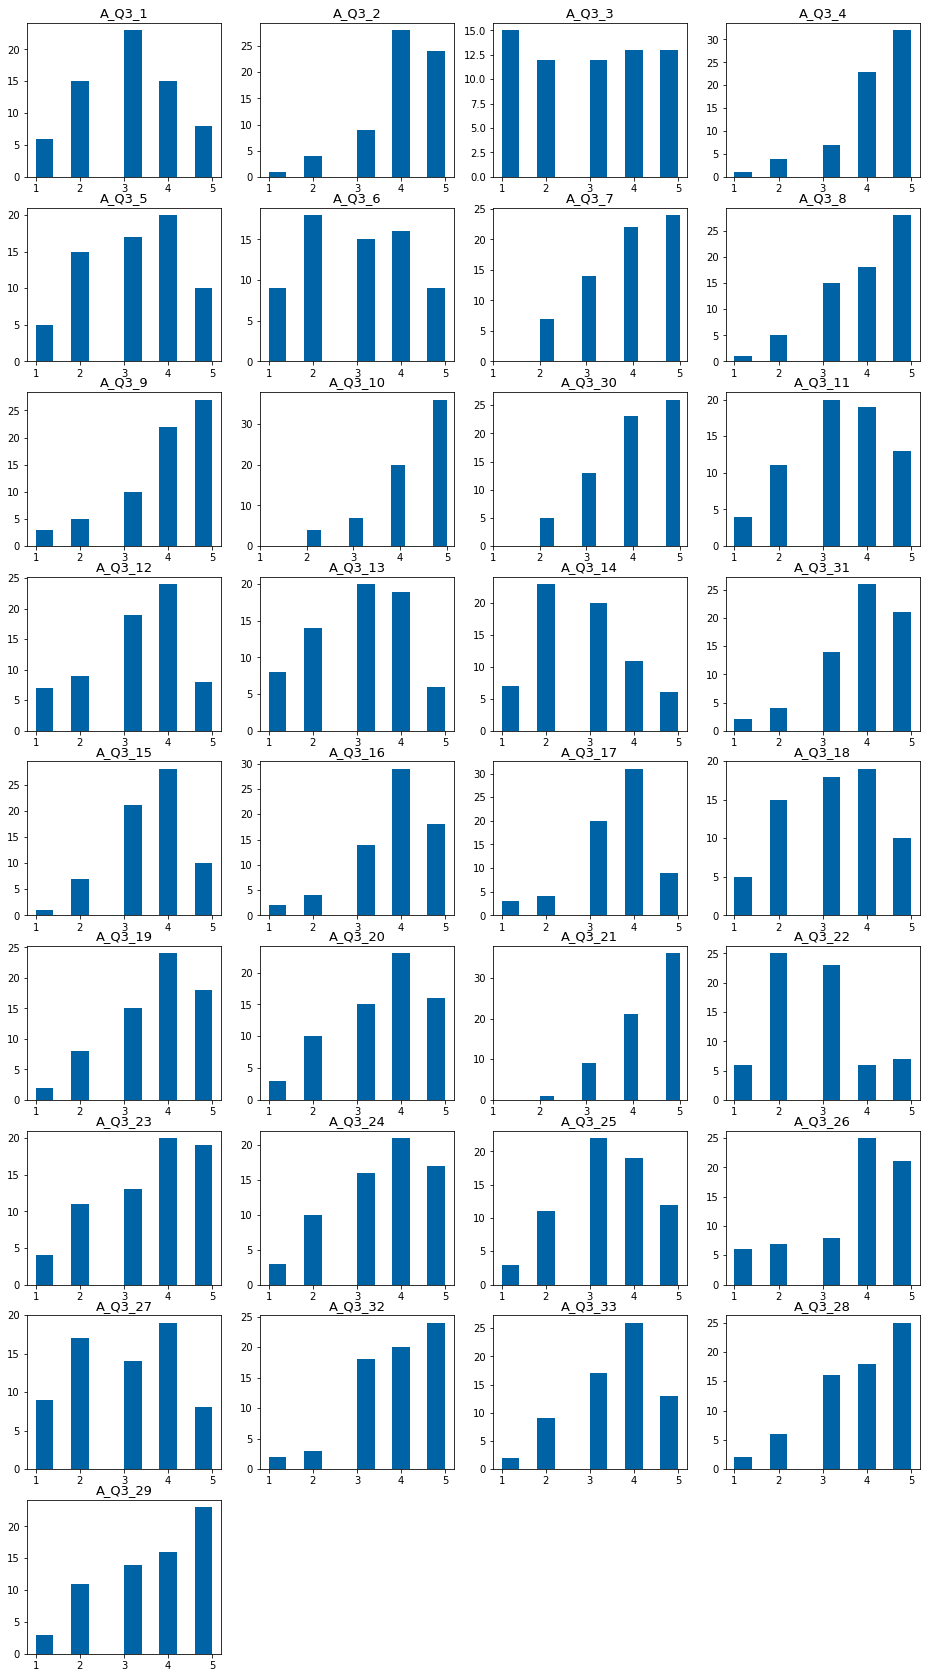

In [17]:
graf_hist(Liste_A_Q3,16,30,9,4)

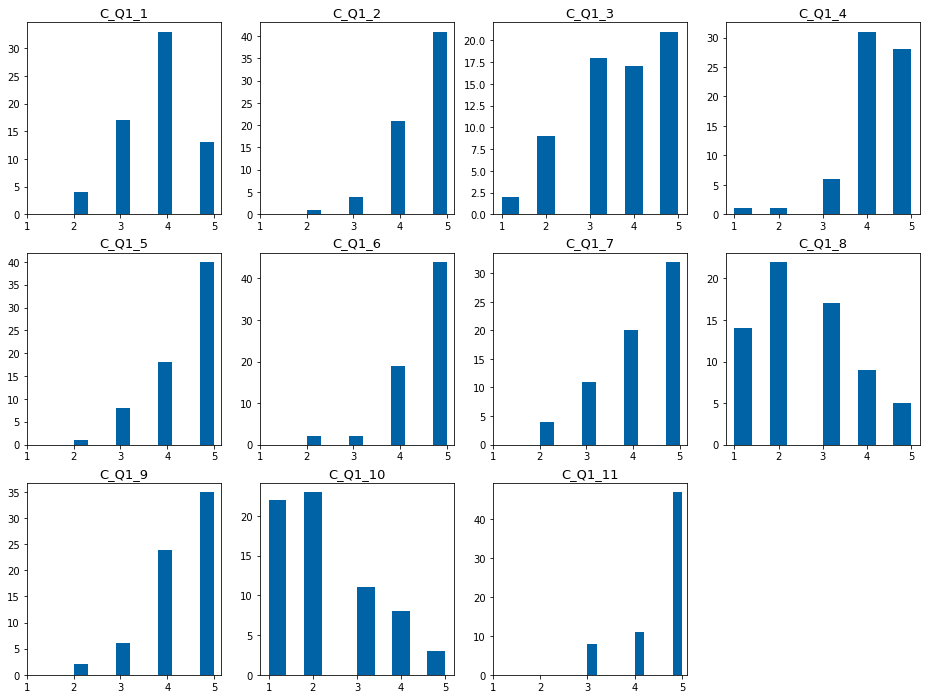

In [18]:
graf_hist(Liste_C_Q1,16,12,3,4)

### Korrelation

Funktion für Korrelationen:

In [19]:
def get_Korr_M(Dat,l):
    return pd.DataFrame(np.corrcoef(Dat[l].dropna().T),columns = l, index = l)

Korrelation für A_Q2:

In [20]:
Korr_A_Q2 = get_Korr_M(Daten,Liste_A_Q2)

Korrelation für A_Q3:

In [21]:
Korr_A_Q3 = get_Korr_M(Daten,Liste_A_Q3)

In [22]:
Korr_C_Q1 = get_Korr_M(Daten,Liste_C_Q1)

Funktion, um Daten mit bestimmtem Korrelationswert (z.B. über 0,5) zu bekommen:

In [23]:
def get_max_corr(df,col,lim = 0.5):
    return df[(df[col] > lim) & (df[col].dropna() < 0.99)][col]

In [24]:
get_max_corr(Korr_A_Q3,'A_Q3_1', lim = 0.4)

A_Q3_2     0.469917
A_Q3_11    0.405196
A_Q3_12    0.423585
Name: A_Q3_1, dtype: float64

In [25]:
for col in Liste_A_Q3:
    print(get_max_corr(Korr_A_Q3,col,0.7))

Series([], Name: A_Q3_1, dtype: float64)
Series([], Name: A_Q3_2, dtype: float64)
Series([], Name: A_Q3_3, dtype: float64)
Series([], Name: A_Q3_4, dtype: float64)
Series([], Name: A_Q3_5, dtype: float64)
Series([], Name: A_Q3_6, dtype: float64)
A_Q3_9    0.70272
Name: A_Q3_7, dtype: float64
A_Q3_9    0.756879
Name: A_Q3_8, dtype: float64
A_Q3_7    0.702720
A_Q3_8    0.756879
Name: A_Q3_9, dtype: float64
Series([], Name: A_Q3_10, dtype: float64)
Series([], Name: A_Q3_30, dtype: float64)
Series([], Name: A_Q3_11, dtype: float64)
Series([], Name: A_Q3_12, dtype: float64)
Series([], Name: A_Q3_13, dtype: float64)
Series([], Name: A_Q3_14, dtype: float64)
Series([], Name: A_Q3_31, dtype: float64)
Series([], Name: A_Q3_15, dtype: float64)
Series([], Name: A_Q3_16, dtype: float64)
Series([], Name: A_Q3_17, dtype: float64)
Series([], Name: A_Q3_18, dtype: float64)
Series([], Name: A_Q3_19, dtype: float64)
Series([], Name: A_Q3_20, dtype: float64)
Series([], Name: A_Q3_21, dtype: float64)
Seri

In [26]:
get_max_corr(Korr_C_Q1,'C_Q1_1', lim = 0.4)

C_Q1_4    0.463419
Name: C_Q1_1, dtype: float64

In [27]:
for col in Liste_C_Q1:
    print(get_max_corr(Korr_C_Q1,col,0.5))

Series([], Name: C_Q1_1, dtype: float64)
C_Q1_9    0.538609
Name: C_Q1_2, dtype: float64
Series([], Name: C_Q1_3, dtype: float64)
Series([], Name: C_Q1_4, dtype: float64)
Series([], Name: C_Q1_5, dtype: float64)
Series([], Name: C_Q1_6, dtype: float64)
Series([], Name: C_Q1_7, dtype: float64)
Series([], Name: C_Q1_8, dtype: float64)
C_Q1_2    0.538609
Name: C_Q1_9, dtype: float64
Series([], Name: C_Q1_10, dtype: float64)
Series([], Name: C_Q1_11, dtype: float64)


### Cronbach's Alpha berechnen

In [28]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [29]:
CronbachAlpha(Daten[Liste_A_Q3].fillna(3))

0.88526927785798026

In [30]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [31]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

In [32]:
CronbachAlpha(Daten[Liste_AC_Q].fillna(3))

0.8915924995049429

In [33]:
CronbachAlpha(Daten[Liste_C_Q1].fillna(3))

0.50860376739481084

In [34]:
CronbachAlpha(Daten[Liste_A_Q2].fillna(3))

0.4391419908909992

In [35]:
Liste_A_Q_test = Liste_A_Q3[:10]

einzelne Elemente für Liste auswählen: Name der Liste = [Bezeichnung, Bezeichnung]

* von ... bis... = Name der Liste[Zeile:Zeile]
* ab ... = Name der Liste[Zeile:]
* bis ... = Name der Liste[:Zeile]

In [36]:
CronbachAlpha(Daten[Liste_A_Q3[14:21]].fillna(3))

0.69351773563634911

In [37]:
CronbachAlpha(Daten[Liste_C_Q1[2:8]].fillna(3))

0.32030075187969931

### Zeitanalyse

#### Zeitformat ändern

In [39]:
type(Daten.V8[0])

str

gibt Info über Format einer Spalte, hier "str" (Text)

In [43]:
Daten['V8'] = pd.to_datetime(Daten.V8)
Daten['V9'] = pd.to_datetime(Daten.V9)

Umformatierung zum "Datetime"-Format

In [87]:
(Daten['V9'][0] - Daten['V8'][0]).components

Components(days=0, hours=0, minutes=15, seconds=10, milliseconds=0, microseconds=0, nanoseconds=0)

zeigt Komponenten des Datetime-Formats an

#### Beantwortungszeit berechnen

In [62]:
Daten['Diff'] = (Daten['V9'] - Daten['V8']).dt.total_seconds()

neue Spalte: "Daten.Diff", die Unterschied zwischen Anfangs- und Endzeit der Beantwortung in Sekunden angibt

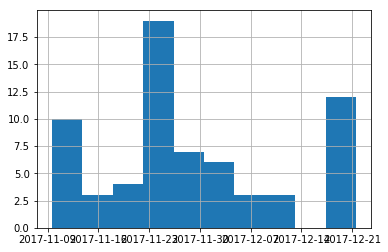

In [47]:
Daten.V9.hist()

In [69]:
Daten.Diff.describe()

count        67.000000
mean      19145.223881
std       85471.335119
min         664.000000
25%        1098.500000
50%        1343.000000
75%        1790.500000
max      603273.000000
Name: Diff, dtype: float64

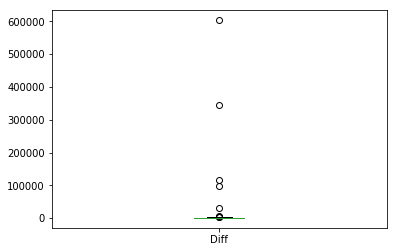

In [70]:
Daten.Diff.plot.box()

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyers zu erkennen -> sollen nicht mit berücksichtigt werden (z.B. TN, die an einem Tag begonnen und später beendet haben...)

sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen

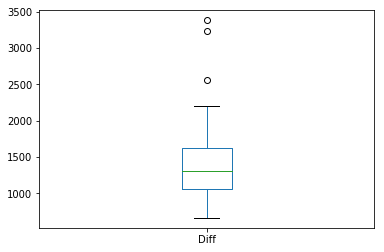

In [78]:
Daten[Daten.Diff < 4000].Diff.plot.box()

In [88]:
Daten[Daten.Diff < 4000].Diff.describe()

count      61.000000
mean     1413.442623
std       527.476146
min       664.000000
25%      1061.000000
50%      1313.000000
75%      1630.000000
max      3381.000000
Name: Diff, dtype: float64

In [91]:
1413/60

23.55

Schlussfolgerung:

durchschnittliche Beantwortungszeit liegt bei ca. 24min, wobei berücksichtigt werden muss, dass TN außerhalb des Unterrichts Pausen einlegen konnten und dass z.T. bei der Beantwortung im Unterricht mehr Zeit für Erklärungen/Einloggen/Abwarten... verwendet wurde